# Project 3 - Predicting the Age of Abalone

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Data Preprocessing

In [24]:
# Read in unscaled version of the dataset
unscaled_df = pd.read_csv('./Dataset/abalone_unscaled_data.csv')
unscaled_df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,M,91,73,19,102.8,44.9,20.2,30.0,15,16.5
1,M,70,53,18,45.1,19.9,9.7,14.0,7,8.5
2,F,106,84,27,135.4,51.3,28.3,42.0,9,10.5
3,M,88,73,25,103.2,43.1,22.8,31.0,10,11.5
4,I,66,51,16,41.0,17.9,7.9,11.0,7,8.5


In [26]:
# Label Encode the categorical "Sex" column
# Note: Female => 0
#       Infant => 1
#       Male   => 2
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
unscaled_df['Sex_LabelEncoded'] = le.fit_transform(unscaled_df['Sex'])
unscaled_df.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age,Sex_LabelEncoded
0,M,91,73,19,102.8,44.9,20.2,30.0,15,16.5,2
1,M,70,53,18,45.1,19.9,9.7,14.0,7,8.5,2
2,F,106,84,27,135.4,51.3,28.3,42.0,9,10.5,0
3,M,88,73,25,103.2,43.1,22.8,31.0,10,11.5,2
4,I,66,51,16,41.0,17.9,7.9,11.0,7,8.5,1


In [28]:
# Binary encode the categorical "Sex" column
unscaled_df = pd.get_dummies(unscaled_df, prefix=['Sex'], columns=['Sex'])
unscaled_df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age,Sex_LabelEncoded,Sex_F,Sex_I,Sex_M
0,91,73,19,102.8,44.9,20.2,30.0,15,16.5,2,0,0,1
1,70,53,18,45.1,19.9,9.7,14.0,7,8.5,2,0,0,1
2,106,84,27,135.4,51.3,28.3,42.0,9,10.5,0,1,0,0
3,88,73,25,103.2,43.1,22.8,31.0,10,11.5,2,0,0,1
4,66,51,16,41.0,17.9,7.9,11.0,7,8.5,1,0,1,0


In [30]:
# Reorganize columns
column_order = ["Sex_LabelEncoded", "Sex_M", "Sex_F", "Sex_I", "Length", 
                "Diameter", "Height", "Whole_weight", "Shucked_weight", 
                "Viscera_weight", "Shell_weight", "Rings", "Age"]
unscaled_df = unscaled_df.reindex(columns=column_order)
unscaled_df.head()

,Sex_LabelEncoded,Sex_M,Sex_F,Sex_I,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,2,1,0,0,91,73,19,102.8,44.9,20.2,30.0,15,16.5
1,2,1,0,0,70,53,18,45.1,19.9,9.7,14.0,7,8.5
2,0,0,1,0,106,84,27,135.4,51.3,28.3,42.0,9,10.5
3,2,1,0,0,88,73,25,103.2,43.1,22.8,31.0,10,11.5
4,1,0,0,1,66,51,16,41.0,17.9,7.9,11.0,7,8.5


## Determine X and y (Example using Sex_LabelEncoded and y=Rings)

In [33]:
# Determine X 
X = unscaled_df[['Sex_LabelEncoded', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                 'Shucked_weight', 'Viscera_weight', 'Shell_weight']]

# Determine y
y = unscaled_df["Rings"].values.reshape(-1, 1)


## Perform Train-Test-Split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Scale our data

In [40]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)




## Example Linear Regression

In [42]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

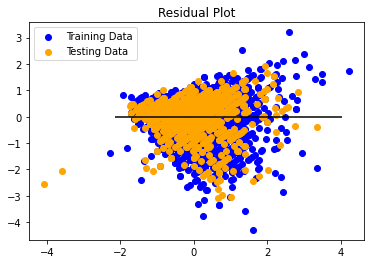

In [43]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()


In [46]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.46242287094296114, R2: 0.5314335652471704
